# <center> Statistic with Python</center> 
<center> Alejandro MARTINEZ (CentraleSupelec) </center> 

## Practical 3

## Data Manipulating

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

* Read in the data

In [2]:
file_name = 'experiment.xls'
data = pd.read_excel(file_name, skiprows=2)

* Create DataFrame

In [3]:
data=data[['group','weight']]
data.groupby('group').describe()

weight                                                    
            count   mean       std   min     25%    50%     75%   max
group                                                                
Control      10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
TreatmentA   10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
TreatmentB   10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

* Boxplot

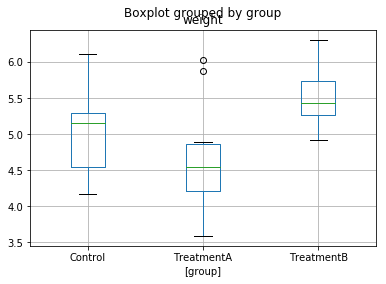

In [4]:
data = data[['group', 'weight']]
data.boxplot(by = 'group')
plt.show() # min, 25, 50, 75, and max are given in both boxplot and describe()

* Extract 3 columns and 10 lines

In [5]:
data2 = pd.read_excel(file_name, skiprows=2)
data2 = data2[0:10][['control', 'treatmentA', 'treatmentB']]
data2

,control,treatmentA,treatmentB
0,4.17,4.81,6.31
1,5.58,4.17,5.12
2,5.18,4.41,5.54
3,6.11,3.59,5.50
4,4.50,5.87,5.37
5,4.61,3.83,5.29
6,5.17,6.03,4.92
7,4.53,4.89,6.15
8,5.33,4.32,5.80
9,5.14,4.69,5.26


* Extract into an array, plot using scatter

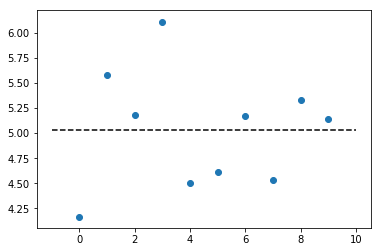

In [6]:
data2_control = data2['control'].values
plt.scatter(np.arange(len(data2_control)), data2_control)
plt.hlines(np.mean(data2_control),-1,len(data2_control),linestyle='--')
plt.show()

## Hypothesis Test

### Exercise 2

* Get the data

In [7]:
data = np.array([5260, 5470, 5640, 6180, 6390, 6515,6805, 7515, 7515, 8230, 8770])

* Value to compare the data to

In [8]:
checkValue = 7725

* Sample t-test

In [10]:
(t, prob)=stats.ttest_1samp(data, checkValue) # prob = 0.018
if prob < 0.05:
    print('With the one-sample t-test, {0:4.2f} is significantly different from the mean (p={1:5.3f}).'.format(checkValue, prob))
else:
    print('No difference from reference value with onesample t-test.')

With the one-sample t-test, 7725.00 is significantly different from the mean (p=0.018).


* Wilcoxon signed rank sum test

In [19]:
(_,p) = stats.wilcoxon(data-checkValue) # p = 0.026
if p < 0.05:
    print('With the Wilcoxon test, {0:4.2f} is significantly different from the mean (p={1:5.3f}).'.format(checkValue, p))
else:
    print('No difference from reference value with Wilcoxon rank sum test.')

With the Wilcoxon test, 7725.00 is significantly different from the mean (p=0.026).


### Exercise 3. Two groups

* Enter the data

In [12]:
data1 = [76., 101., 66., 72., 88., 82., 79., 73., 76., 85., 75., 64., 76., 81., 86.]
data2 = [64., 65., 56., 62., 59., 76., 66., 82., 91., 57., 92., 80., 82., 67., 54.]

* Normality test

In [13]:
(_, pval) = stats.normaltest(data1)
if pval > 0.05:
    print('Dataset 1 is normally distributed')
(_, pval) = stats.normaltest(data2) 
if pval > 0.05:
    print('Dataset 2 is normally distributed')

Dataset 1 is normally distributed
Dataset 2 is normally distributed


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


* Paired t-Test and Wilcoxon signed rank sum test

In [14]:
    (t, pval)= stats.ttest_ind(data1, data2) # p = 0.045
if pval < 0.05:
    print('With the T-test, data1 and data2 are significantly different (p = {0:5.3f})'.format(pval))
else:
    print('No difference between data1 and data2 with T-test.')

With the T-test, data1 and data2 are significantly different (p = 0.045)


* Mann–Whitney test

In [15]:
(u, pval) = stats.mannwhitneyu(data1, data2, alternative='two-sided') # pval = 0.077401944758051816
if pval < 0.05:
    print('With the Mann-Whitney test, data1 and data2 are significantly different(p = {0:5.3f})'.format(pval))
else:
    print('No difference between data1 and data2 with Mann-Whitney test.')

No difference between data1 and data2 with Mann-Whitney test.


## Sensitivity and Specificity

In [16]:
TP_test1=980
FN_test1=20

TP_test2=2800
FN_test2=200

In [17]:
Sensitivity1=TP_test1/(TP_test1+FN_test1)
Sensitivity2=TP_test2/(TP_test2+FN_test2)
print(Sensitivity1,Sensitivity2)

0.98 0.9333333333333333


Sensitivity has to be high. Test 1 has 98%, test 2 93%, test 1 is better.